In [64]:
from torch.optim import SGD
from model import Network, CosineLoss
from dataset import MyDataset
import torch
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def cosine_similarity(x,y):
  dot_product = np.dot(x,y)
  product_norm = np.linalg.norm(x) * np.linalg.norm(x)
  return dot_product/product_norm

In [65]:
!nvidia-smi

Fri Dec 23 13:40:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  Off  | 00000000:3B:00.0 Off |                    0 |
| N/A   28C    P0    36W / 250W |    993MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  Off  | 00000000:AF:00.0 Off |                    0 |
| N/A   

In [66]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [115]:
n=2
n_samples = 10000
min_value = 0
max_value = 1000

validation_percentage=0.2
batch_size=256
n_epochs=100
device = "cuda:0" if torch.cuda.is_available() else "cpu"
momentum=0.9
lr = 1e-3
N=2*n


In [116]:
## Init Dataloader
dataset = MyDataset(n, n_samples,  min_value, max_value, device)

train_dataloader, validation_dataloader = dataset.split_train_validation(dataset, batch_size=batch_size, validation_split=validation_percentage, shuffle=True, num_workers=0)

network = Network(n_inputs=N, n_outputs=N, n_units=64, n_layers=1).to(device)
optimizer = SGD(network.parameters(), lr=lr, momentum=momentum)
criterion = CosineLoss().to(device)

--------------------------------------
[INFO] Input dataset shape : torch.Size([10000, 4])
[INFO] Total number of observations in the dataset : 10000
--------------------------------------
[INFO] using 8000 observations for training.
[INFO] using 2000 observations for validation.


In [117]:
network

Network(
  (net): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=4, bias=True)
  )
)

In [118]:
losses=[]
for epoch in tqdm(range(n_epochs)):

  print("\n epoch = ",epoch," --------------------------------------------------------\n")
  
  for batch_idx, x in enumerate(train_dataloader) : 

      optimizer.zero_grad()

      outputs = network(x)

      x_hat = outputs[: , :int(N/2)]
      y_hat = outputs[:, int(N/2):]
      
      loss = criterion(x_hat, y_hat)
      losses.append(loss.item())
      loss.backward()
      optimizer.step()

  print(f'[{epoch + 1}/ {n_epochs}] loss: {loss.item():}')

  0%|          | 0/100 [00:00<?, ?it/s]


 epoch =  0  --------------------------------------------------------



  1%|          | 1/100 [00:03<06:25,  3.90s/it]

[1/ 100] loss: 0.24277158081531525

 epoch =  1  --------------------------------------------------------



  2%|▏         | 2/100 [00:07<06:17,  3.85s/it]

[2/ 100] loss: 0.18372578918933868

 epoch =  2  --------------------------------------------------------



  3%|▎         | 3/100 [00:11<06:22,  3.95s/it]

[3/ 100] loss: 0.07361001521348953

 epoch =  3  --------------------------------------------------------



  4%|▍         | 4/100 [00:15<06:14,  3.90s/it]

[4/ 100] loss: 0.037976812571287155

 epoch =  4  --------------------------------------------------------



  5%|▌         | 5/100 [00:19<06:11,  3.91s/it]

[5/ 100] loss: 0.03367329761385918

 epoch =  5  --------------------------------------------------------



  6%|▌         | 6/100 [00:23<06:04,  3.88s/it]

[6/ 100] loss: 0.01352668832987547

 epoch =  6  --------------------------------------------------------



  7%|▋         | 7/100 [00:27<05:59,  3.87s/it]

[7/ 100] loss: 0.011132906191051006

 epoch =  7  --------------------------------------------------------



  8%|▊         | 8/100 [00:31<05:59,  3.91s/it]

[8/ 100] loss: 0.004490742925554514

 epoch =  8  --------------------------------------------------------



  9%|▉         | 9/100 [00:35<05:58,  3.94s/it]

[9/ 100] loss: 0.005135009530931711

 epoch =  9  --------------------------------------------------------



 10%|█         | 10/100 [00:39<05:51,  3.91s/it]

[10/ 100] loss: 0.0033527116756886244

 epoch =  10  --------------------------------------------------------



 11%|█         | 11/100 [00:42<05:45,  3.89s/it]

[11/ 100] loss: 0.0020380716305226088

 epoch =  11  --------------------------------------------------------



 12%|█▏        | 12/100 [00:46<05:40,  3.87s/it]

[12/ 100] loss: 0.0017266969662159681

 epoch =  12  --------------------------------------------------------



 13%|█▎        | 13/100 [00:50<05:36,  3.87s/it]

[13/ 100] loss: 0.0006958346348255873

 epoch =  13  --------------------------------------------------------



 14%|█▍        | 14/100 [00:54<05:31,  3.86s/it]

[14/ 100] loss: 0.0009011130314320326

 epoch =  14  --------------------------------------------------------



 15%|█▌        | 15/100 [00:58<05:27,  3.86s/it]

[15/ 100] loss: 0.0007161598186939955

 epoch =  15  --------------------------------------------------------



 16%|█▌        | 16/100 [01:02<05:24,  3.87s/it]

[16/ 100] loss: 0.000328670023009181

 epoch =  16  --------------------------------------------------------



 17%|█▋        | 17/100 [01:06<05:21,  3.87s/it]

[17/ 100] loss: 0.0004440050106495619

 epoch =  17  --------------------------------------------------------



 18%|█▊        | 18/100 [01:09<05:17,  3.88s/it]

[18/ 100] loss: 0.0002236466243630275

 epoch =  18  --------------------------------------------------------



 19%|█▉        | 19/100 [01:13<05:13,  3.88s/it]

[19/ 100] loss: 0.0001956920459633693

 epoch =  19  --------------------------------------------------------



 20%|██        | 20/100 [01:17<05:09,  3.87s/it]

[20/ 100] loss: 0.00031001376919448376

 epoch =  20  --------------------------------------------------------



 21%|██        | 21/100 [01:21<05:05,  3.87s/it]

[21/ 100] loss: 0.000247488496825099

 epoch =  21  --------------------------------------------------------



 22%|██▏       | 22/100 [01:25<05:01,  3.86s/it]

[22/ 100] loss: 0.00023503111151512712

 epoch =  22  --------------------------------------------------------



 23%|██▎       | 23/100 [01:29<04:57,  3.87s/it]

[23/ 100] loss: 9.358928946312517e-05

 epoch =  23  --------------------------------------------------------



 24%|██▍       | 24/100 [01:33<04:54,  3.88s/it]

[24/ 100] loss: 7.701919821556658e-05

 epoch =  24  --------------------------------------------------------



 25%|██▌       | 25/100 [01:37<04:50,  3.87s/it]

[25/ 100] loss: 0.00017816828039940447

 epoch =  25  --------------------------------------------------------



 26%|██▌       | 26/100 [01:40<04:46,  3.88s/it]

[26/ 100] loss: 0.0002938609104603529

 epoch =  26  --------------------------------------------------------



 27%|██▋       | 27/100 [01:44<04:42,  3.87s/it]

[27/ 100] loss: 0.000135372145450674

 epoch =  27  --------------------------------------------------------



 28%|██▊       | 28/100 [01:48<04:38,  3.86s/it]

[28/ 100] loss: 0.0002582769375294447

 epoch =  28  --------------------------------------------------------



 29%|██▉       | 29/100 [01:52<04:35,  3.88s/it]

[29/ 100] loss: 0.00015903518942650408

 epoch =  29  --------------------------------------------------------



 30%|███       | 30/100 [01:56<04:31,  3.87s/it]

[30/ 100] loss: 0.0002376537158852443

 epoch =  30  --------------------------------------------------------



 31%|███       | 31/100 [02:00<04:27,  3.88s/it]

[31/ 100] loss: 0.0001621346309548244

 epoch =  31  --------------------------------------------------------



 32%|███▏      | 32/100 [02:04<04:25,  3.90s/it]

[32/ 100] loss: 0.00013680265692528337

 epoch =  32  --------------------------------------------------------



 33%|███▎      | 33/100 [02:08<04:21,  3.90s/it]

[33/ 100] loss: 0.0002065996959572658

 epoch =  33  --------------------------------------------------------



 34%|███▍      | 34/100 [02:11<04:16,  3.89s/it]

[34/ 100] loss: 0.00013865040091332048

 epoch =  34  --------------------------------------------------------



 35%|███▌      | 35/100 [02:15<04:14,  3.91s/it]

[35/ 100] loss: 0.00018132732657250017

 epoch =  35  --------------------------------------------------------



 36%|███▌      | 36/100 [02:19<04:11,  3.92s/it]

[36/ 100] loss: 0.00016660497931297868

 epoch =  36  --------------------------------------------------------



 37%|███▋      | 37/100 [02:23<04:08,  3.94s/it]

[37/ 100] loss: 0.00010425852087792009

 epoch =  37  --------------------------------------------------------



 38%|███▊      | 38/100 [02:27<04:03,  3.93s/it]

[38/ 100] loss: 0.00020314262656029314

 epoch =  38  --------------------------------------------------------



 39%|███▉      | 39/100 [02:31<03:59,  3.92s/it]

[39/ 100] loss: 0.00012607382086571306

 epoch =  39  --------------------------------------------------------



 40%|████      | 40/100 [02:35<03:54,  3.91s/it]

[40/ 100] loss: 9.132431296166033e-05

 epoch =  40  --------------------------------------------------------



 41%|████      | 41/100 [02:39<03:58,  4.05s/it]

[41/ 100] loss: 0.00013835237768944353

 epoch =  41  --------------------------------------------------------



 42%|████▏     | 42/100 [02:44<04:02,  4.18s/it]

[42/ 100] loss: 0.00015045212057884783

 epoch =  42  --------------------------------------------------------



 43%|████▎     | 43/100 [02:48<04:01,  4.23s/it]

[43/ 100] loss: 0.00010247038153465837

 epoch =  43  --------------------------------------------------------



 44%|████▍     | 44/100 [02:53<03:58,  4.26s/it]

[44/ 100] loss: 0.0002927284222096205

 epoch =  44  --------------------------------------------------------



 45%|████▌     | 45/100 [02:57<03:52,  4.22s/it]

[45/ 100] loss: 0.00016112135199364275

 epoch =  45  --------------------------------------------------------



 46%|████▌     | 46/100 [03:01<03:47,  4.22s/it]

[46/ 100] loss: 0.00014377640036400408

 epoch =  46  --------------------------------------------------------



 47%|████▋     | 47/100 [03:05<03:42,  4.19s/it]

[47/ 100] loss: 0.0001404385402565822

 epoch =  47  --------------------------------------------------------



 48%|████▊     | 48/100 [03:09<03:35,  4.15s/it]

[48/ 100] loss: 0.0002678136806935072

 epoch =  48  --------------------------------------------------------



 49%|████▉     | 49/100 [03:13<03:28,  4.10s/it]

[49/ 100] loss: 0.00012219951895531267

 epoch =  49  --------------------------------------------------------



 50%|█████     | 50/100 [03:17<03:23,  4.06s/it]

[50/ 100] loss: 0.00017065809515770525

 epoch =  50  --------------------------------------------------------



 51%|█████     | 51/100 [03:21<03:16,  4.01s/it]

[51/ 100] loss: 0.00016660497931297868

 epoch =  51  --------------------------------------------------------



 52%|█████▏    | 52/100 [03:25<03:11,  3.99s/it]

[52/ 100] loss: 0.00019032762793358415

 epoch =  52  --------------------------------------------------------



 53%|█████▎    | 53/100 [03:29<03:06,  3.97s/it]

[53/ 100] loss: 0.00011915968207176775

 epoch =  53  --------------------------------------------------------



 54%|█████▍    | 54/100 [03:33<03:02,  3.96s/it]

[54/ 100] loss: 0.00016606853751000017

 epoch =  54  --------------------------------------------------------



 55%|█████▌    | 55/100 [03:37<02:57,  3.94s/it]

[55/ 100] loss: 0.00013549135474022478

 epoch =  55  --------------------------------------------------------



 56%|█████▌    | 56/100 [03:41<02:52,  3.93s/it]

[56/ 100] loss: 9.186075476463884e-05

 epoch =  56  --------------------------------------------------------



 57%|█████▋    | 57/100 [03:44<02:48,  3.93s/it]

[57/ 100] loss: 0.00012696789053734392

 epoch =  57  --------------------------------------------------------



 58%|█████▊    | 58/100 [03:48<02:44,  3.92s/it]

[58/ 100] loss: 8.804605749901384e-05

 epoch =  58  --------------------------------------------------------



 59%|█████▉    | 59/100 [03:52<02:40,  3.92s/it]

[59/ 100] loss: 0.00013364361075218767

 epoch =  59  --------------------------------------------------------



 60%|██████    | 60/100 [03:56<02:39,  3.98s/it]

[60/ 100] loss: 0.000317523954436183

 epoch =  60  --------------------------------------------------------



 61%|██████    | 61/100 [04:00<02:35,  3.98s/it]

[61/ 100] loss: 0.00018287704733666033

 epoch =  61  --------------------------------------------------------



 62%|██████▏   | 62/100 [04:04<02:30,  3.97s/it]

[62/ 100] loss: 0.00010467575339134783

 epoch =  62  --------------------------------------------------------



 63%|██████▎   | 63/100 [04:08<02:26,  3.96s/it]

[63/ 100] loss: 0.0001601676776772365

 epoch =  63  --------------------------------------------------------



 64%|██████▍   | 64/100 [04:12<02:22,  3.94s/it]

[64/ 100] loss: 0.0001290540531044826

 epoch =  64  --------------------------------------------------------



 65%|██████▌   | 65/100 [04:16<02:17,  3.92s/it]

[65/ 100] loss: 0.00021154688147362322

 epoch =  65  --------------------------------------------------------



 66%|██████▌   | 66/100 [04:20<02:12,  3.91s/it]

[66/ 100] loss: 0.0002524356823414564

 epoch =  66  --------------------------------------------------------



 67%|██████▋   | 67/100 [04:24<02:08,  3.89s/it]

[67/ 100] loss: 0.00017208860663231462

 epoch =  67  --------------------------------------------------------



 68%|██████▊   | 68/100 [04:28<02:04,  3.89s/it]

[68/ 100] loss: 0.00021017597464378923

 epoch =  68  --------------------------------------------------------



 69%|██████▉   | 69/100 [04:32<02:01,  3.91s/it]

[69/ 100] loss: 8.327768591698259e-05

 epoch =  69  --------------------------------------------------------



 70%|███████   | 70/100 [04:36<01:57,  3.91s/it]

[70/ 100] loss: 0.00013316677359398454

 epoch =  70  --------------------------------------------------------



 71%|███████   | 71/100 [04:39<01:53,  3.90s/it]

[71/ 100] loss: 0.00023044155386742204

 epoch =  71  --------------------------------------------------------



 72%|███████▏  | 72/100 [04:43<01:49,  3.90s/it]

[72/ 100] loss: 0.00014759109762962908

 epoch =  72  --------------------------------------------------------



 73%|███████▎  | 73/100 [04:47<01:45,  3.89s/it]

[73/ 100] loss: 0.00010974214819725603

 epoch =  73  --------------------------------------------------------



 74%|███████▍  | 74/100 [04:51<01:41,  3.89s/it]

[74/ 100] loss: 0.00014592216757591814

 epoch =  74  --------------------------------------------------------



 75%|███████▌  | 75/100 [04:55<01:36,  3.88s/it]

[75/ 100] loss: 0.0001518826320534572

 epoch =  75  --------------------------------------------------------



 76%|███████▌  | 76/100 [04:59<01:33,  3.88s/it]

[76/ 100] loss: 0.0001468758418923244

 epoch =  76  --------------------------------------------------------



 77%|███████▋  | 77/100 [05:03<01:29,  3.88s/it]

[77/ 100] loss: 0.0001245837047463283

 epoch =  77  --------------------------------------------------------



 78%|███████▊  | 78/100 [05:07<01:24,  3.86s/it]

[78/ 100] loss: 0.00038183736614882946

 epoch =  78  --------------------------------------------------------



 79%|███████▉  | 79/100 [05:10<01:21,  3.87s/it]

[79/ 100] loss: 0.0003116230946034193

 epoch =  79  --------------------------------------------------------



 80%|████████  | 80/100 [05:14<01:17,  3.87s/it]

[80/ 100] loss: 6.182001379784197e-05

 epoch =  80  --------------------------------------------------------



 81%|████████  | 81/100 [05:18<01:13,  3.87s/it]

[81/ 100] loss: 0.00012631223944481462

 epoch =  81  --------------------------------------------------------



 82%|████████▏ | 82/100 [05:22<01:09,  3.86s/it]

[82/ 100] loss: 0.00011093424109276384

 epoch =  82  --------------------------------------------------------



 83%|████████▎ | 83/100 [05:26<01:05,  3.85s/it]

[83/ 100] loss: 0.0001429419353371486

 epoch =  83  --------------------------------------------------------



 84%|████████▍ | 84/100 [05:30<01:01,  3.85s/it]

[84/ 100] loss: 0.00010604666022118181

 epoch =  84  --------------------------------------------------------



 85%|████████▌ | 85/100 [05:33<00:57,  3.85s/it]

[85/ 100] loss: 0.00012160347250755876

 epoch =  85  --------------------------------------------------------



 86%|████████▌ | 86/100 [05:37<00:53,  3.85s/it]

[86/ 100] loss: 0.00016362474707420915

 epoch =  86  --------------------------------------------------------



 87%|████████▋ | 87/100 [05:41<00:50,  3.91s/it]

[87/ 100] loss: 0.0001518230274086818

 epoch =  87  --------------------------------------------------------



 88%|████████▊ | 88/100 [05:45<00:46,  3.91s/it]

[88/ 100] loss: 0.00014133260992821306

 epoch =  88  --------------------------------------------------------



 89%|████████▉ | 89/100 [05:49<00:43,  3.92s/it]

[89/ 100] loss: 0.0001182060077553615

 epoch =  89  --------------------------------------------------------



 90%|█████████ | 90/100 [05:53<00:39,  3.92s/it]

[90/ 100] loss: 0.000248561380431056

 epoch =  90  --------------------------------------------------------



 91%|█████████ | 91/100 [05:57<00:35,  3.91s/it]

[91/ 100] loss: 0.00010658310202416033

 epoch =  91  --------------------------------------------------------



 92%|█████████▏| 92/100 [06:01<00:31,  3.95s/it]

[92/ 100] loss: 6.891296652611345e-05

 epoch =  92  --------------------------------------------------------



 93%|█████████▎| 93/100 [06:05<00:27,  3.96s/it]

[93/ 100] loss: 0.00011254356650169939

 epoch =  93  --------------------------------------------------------



 94%|█████████▍| 94/100 [06:09<00:23,  3.95s/it]

[94/ 100] loss: 0.00015015409735497087

 epoch =  94  --------------------------------------------------------



 95%|█████████▌| 95/100 [06:13<00:19,  3.94s/it]

[95/ 100] loss: 0.00012607382086571306

 epoch =  95  --------------------------------------------------------



 96%|█████████▌| 96/100 [06:17<00:15,  3.91s/it]

[96/ 100] loss: 0.00015468405035790056

 epoch =  96  --------------------------------------------------------



 97%|█████████▋| 97/100 [06:21<00:11,  3.89s/it]

[97/ 100] loss: 0.00011617944983299822

 epoch =  97  --------------------------------------------------------



 98%|█████████▊| 98/100 [06:24<00:07,  3.88s/it]

[98/ 100] loss: 0.00010771559027489275

 epoch =  98  --------------------------------------------------------



 99%|█████████▉| 99/100 [06:28<00:03,  3.86s/it]

[99/ 100] loss: 0.00021089123038109392

 epoch =  99  --------------------------------------------------------



100%|██████████| 100/100 [06:32<00:00,  3.93s/it]

[100/ 100] loss: 0.0002352099254494533


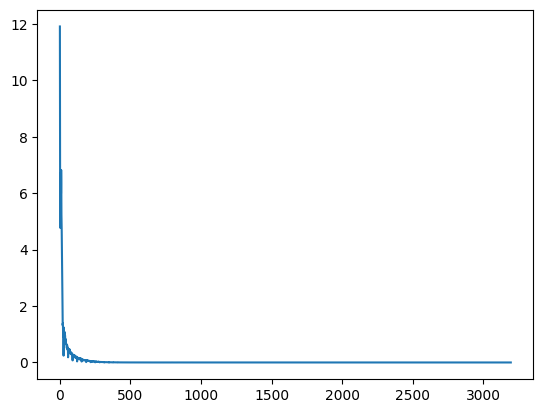

In [126]:
plt.plot(losses[5:])

In [122]:
x = torch.tensor([1.0,0.0, 0.0,0.0]).to(device)
y = network(x)
print(y)

x = torch.tensor([1.0,0.0, 1.0,0.0]).to(device)
y = network(x)
print(y)

x = torch.tensor([1.0,0.0, 0.0,1.0]).to(device)
y = network(x)
print(y)

x = torch.tensor([12.0,5.0, 8.0,11.0]).to(device)
y = network(x)
print(y)

tensor([26.5033, -7.8515, 30.8591, -9.1961], device='cuda:0',
       grad_fn=<AddBackward0>)
tensor([ 51.1093, -16.3658,  51.6795, -16.1179], device='cuda:0',
       grad_fn=<AddBackward0>)
tensor([ 41.8450, -16.9588,  52.1241, -20.9311], device='cuda:0',
       grad_fn=<AddBackward0>)
tensor([ 824.5665, -323.1381,  910.8017, -357.2532], device='cuda:0',
       grad_fn=<AddBackward0>)


In [133]:
def plot_vectors(x, scale=10):
    y = network(x)
    X = y[:int(N/2)].cpu().detach().numpy()
    Y = y[int(N/2):].cpu().detach().numpy()
    print(f'cosine_similarity= {cosine_similarity(x_hat,y_hat)}')
    print(f'X= {X}')
    print(f'Y= {Y}')
    origin = [0], [0] # origin point

    plt.quiver(*origin, X[0], X[1], color=['g'], scale=scale)
    plt.quiver(*origin, Y[0], Y[1], color=['r'], scale=scale)
    plt.show()

cosine_similarity= 1.1649092435836792


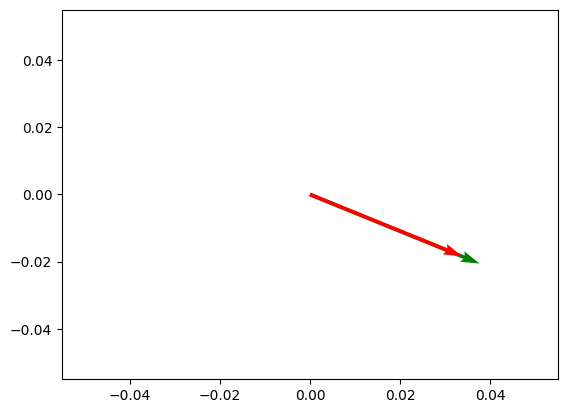

In [138]:
x = torch.tensor([18.0,058.0, 50.0,0.0]).to(device)
plot_vectors(x, scale=10000)

In [97]:
X = np.array([-3.3403, -309.8853])
Y = np.array([-5.6768, -522.7582])
cosine_similarity(X,Y)

1.6869424000244246

In [60]:
X = np.array([-4.7466, 15.7810])
Y = np.array([-4.6922, 16.5692])
cosine_similarity(X,Y)

1.0448516456913506

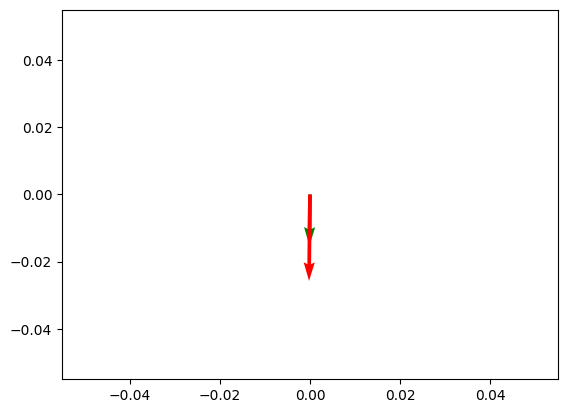

In [106]:


# V = np.array([12.0,5.0])
# W = np.array([8.0,11.0])

X = np.array([-3.3403, -309.8853])
Y = np.array([-5.6768, -522.7582])
origin = np.array([0, 0]) # origin point

# plt.quiver(*origin, V[0], V[1], color=['r'], scale=100)
# plt.quiver(*origin, W[0], W[1], color=['b'], scale=100)
plt.quiver(*origin, X[0], X[1], color=['g'], scale=3000)
plt.quiver(*origin, Y[0], Y[1], color=['r'], scale=3000)
plt.show()